In [101]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Hide/Show: Raw Code"></form>''')

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings("ignore")

from manny_wrangle import *
from env import *

<img src="title.png" alt="title.png" width="800"/>

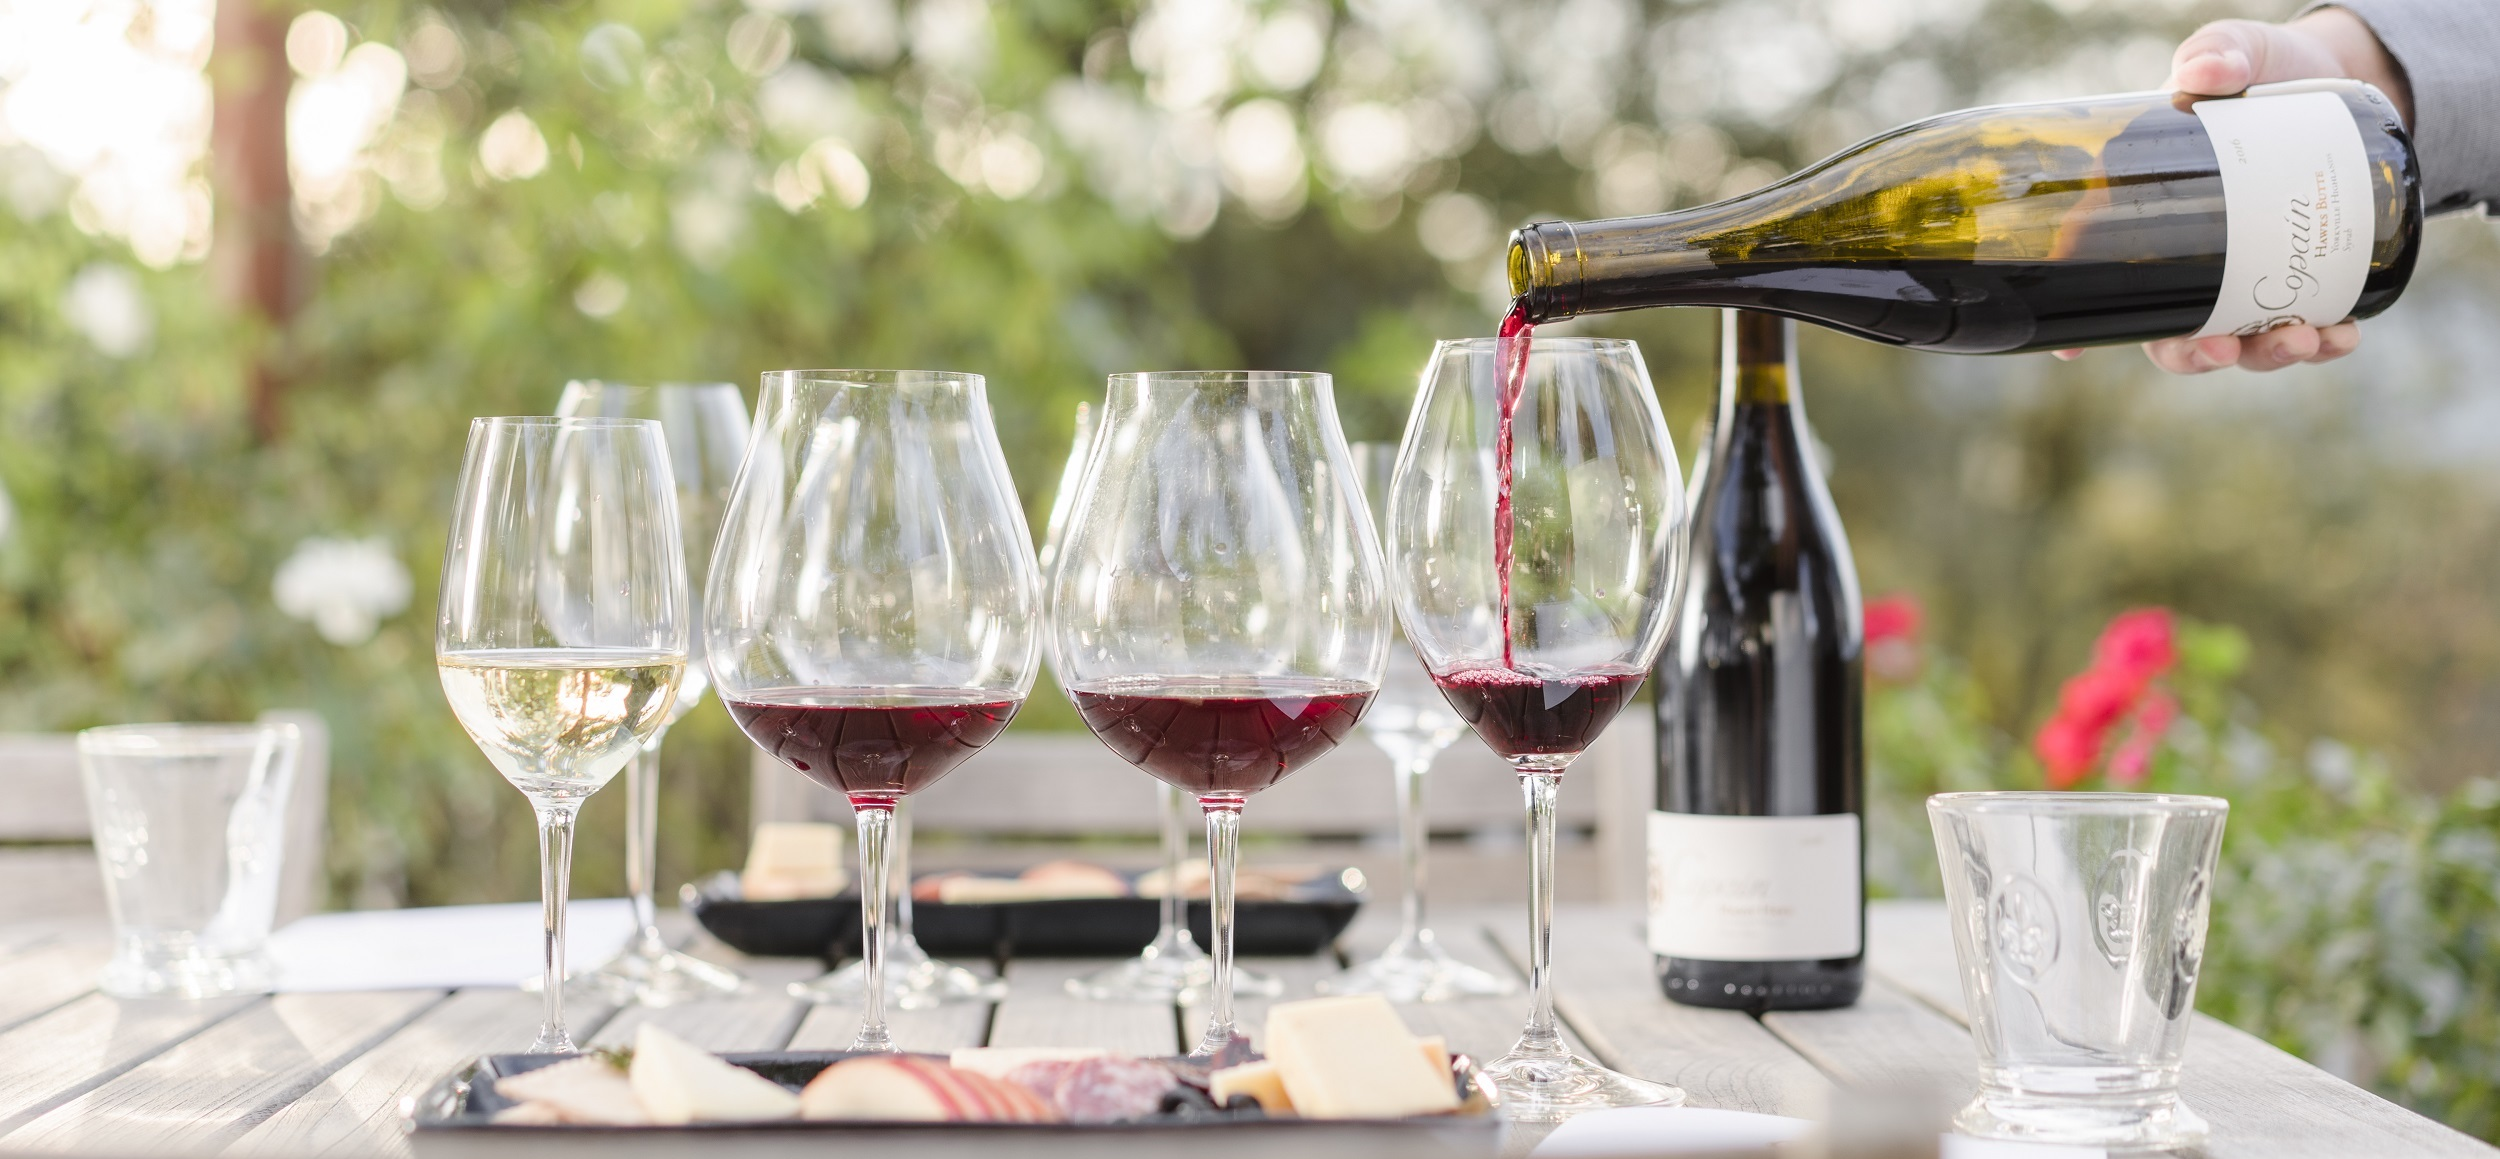

# Acquire

In [3]:
# acquiring data from csv for red & white wines
wine_red = pd.read_csv('winequality-red.csv')
wine_white = pd.read_csv('winequality-white.csv')

In [4]:
wine_red['wine_color']='red'

In [5]:
wine_white['wine_color']='white'

# Concatenate

In [6]:
frames = [wine_red,wine_white]

In [7]:
wines = pd.concat(frames)

# Renaming

In [31]:
rename_columns(wines)

In [9]:
wines.reset_index(drop=True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Cleaning

# Split

In [75]:
train,val,test = split_data(wines)

In [76]:
num,cat = separate_column_type_list(train)

# Scale

In [77]:
train_scaled = train[num]

In [102]:
# Create Object

In [78]:
mm_scaler = MinMaxScaler()
train_scaled[num] = mm_scaler.fit_transform(train_scaled[num])

In [103]:
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
1539,0.288136,0.206667,0.260163,0.018405,0.093023,0.226804,0.159763,0.193368,0.566929,0.318182,0.306452
1109,0.593220,0.260000,0.349593,0.023006,0.269103,0.178694,0.177515,0.213804,0.338583,0.306818,0.451613
100,0.381356,0.353333,0.243902,0.023006,0.124585,0.068729,0.130178,0.194525,0.519685,0.221591,0.354839
3878,0.228814,0.180000,0.252033,0.147239,0.099668,0.391753,0.485207,0.189127,0.346457,0.153409,0.225806
4817,0.169492,0.203333,0.203252,0.047546,0.036545,0.254296,0.343195,0.080393,0.362205,0.232955,0.516129
...,...,...,...,...,...,...,...,...,...,...,...
2173,0.322034,0.160000,0.471545,0.247699,0.068106,0.288660,0.464497,0.246578,0.322835,0.181818,0.193548
3592,0.152542,0.133333,0.219512,0.050613,0.056478,0.350515,0.449704,0.094660,0.480315,0.125000,0.435484
3627,0.220339,0.193333,0.162602,0.076687,0.179402,0.412371,0.523669,0.144207,0.393701,0.119318,0.241935
3791,0.228814,0.120000,0.406504,0.113497,0.069767,0.309278,0.565089,0.159051,0.346457,0.142045,0.241935


# Cluster Model

In [79]:
seed = 42
cluster_count = 4

kmeans = KMeans(n_clusters=cluster_count,random_state=seed)
kmeans.fit(train_scaled)

KMeans(n_clusters=4, random_state=42)

# Fixed

In [94]:
train['clusters']=kmeans.predict(train_scaled)

In [104]:
train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color,clusters
1539,7.2,0.390,0.32,1.80,0.065,34.0,60.0,0.99714,3.46,0.78,9.9,5,red,3
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6,red,2
100,8.3,0.610,0.30,2.10,0.084,11.0,50.0,0.99720,3.40,0.61,10.2,6,red,3
3878,6.5,0.350,0.31,10.20,0.069,58.0,170.0,0.99692,3.18,0.49,9.4,5,white,0
4817,5.8,0.385,0.25,3.70,0.031,38.0,122.0,0.99128,3.20,0.63,11.2,6,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,0
3592,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,0
3627,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,0
3791,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,0


# Visualize Clusters

## Visual #1

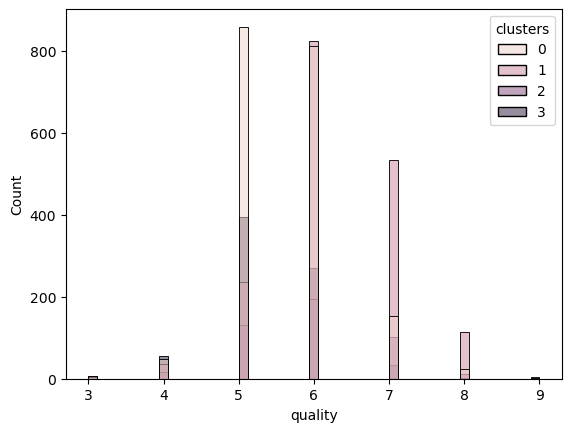

In [95]:
sns.histplot(data=train,x='quality',hue="clusters")
plt.show()

## Visual #2

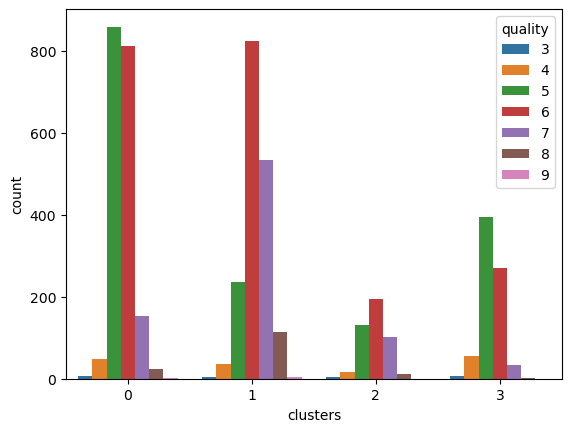

In [96]:
sns.countplot(data=train,x='clusters',hue="quality")
plt.show()

## Visual #3

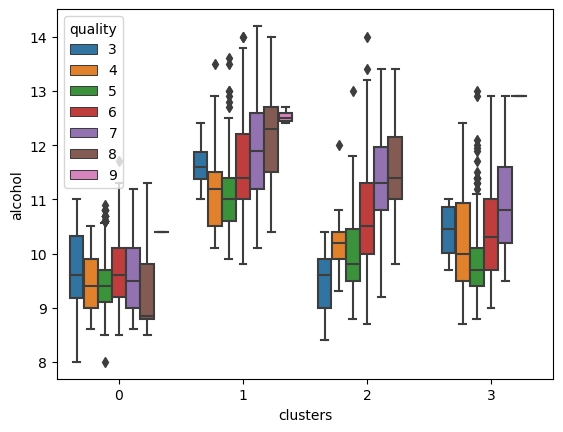

In [97]:
sns.boxplot(data=train,x='clusters',y='alcohol',hue='quality')
plt.show()

## Visual #4

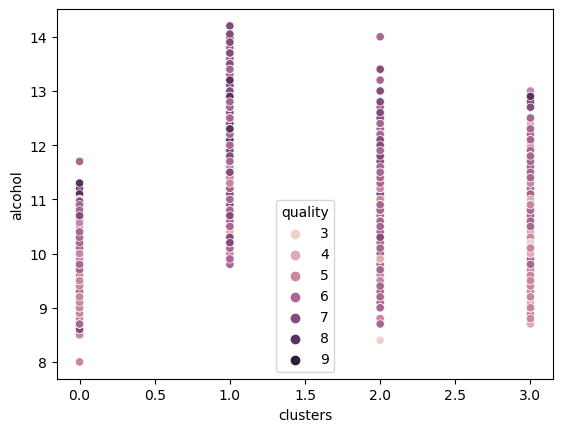

In [98]:
sns.scatterplot(data=train,x='clusters',y='alcohol',hue='quality')
plt.show()

## Visual #5

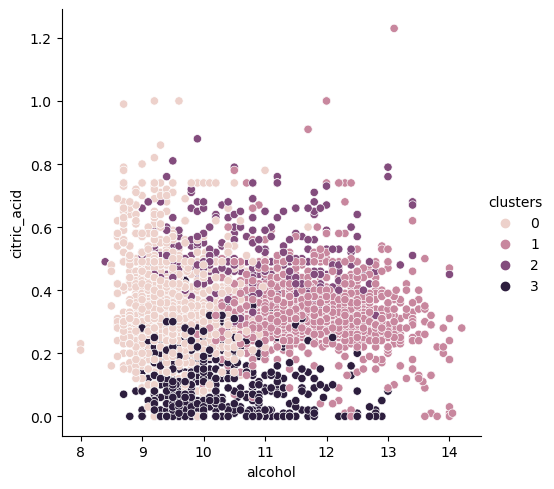

In [99]:
sns.relplot(data=train,x="alcohol",y="citric_acid",hue='clusters')
plt.show()

## Visual #6

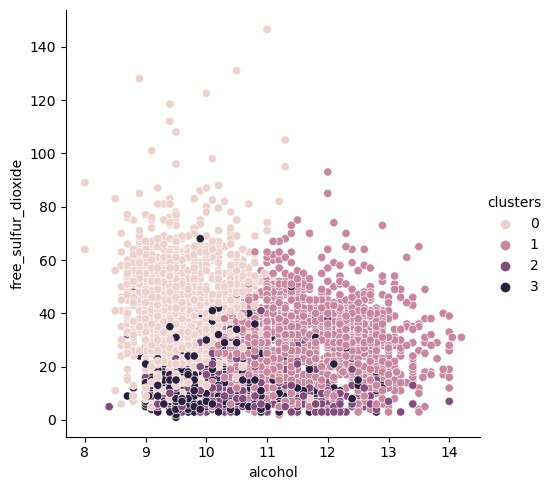

In [100]:
sns.relplot(data=train,x="alcohol",y="free_sulfur_dioxide",hue='clusters')
plt.show()